Exo 1

In [ ]:
def fibo(v):
    a = 1
    b = 1
    while True: 
        temp = a
        a = a + b
        b = temp
        if a > v:
            return a  
        
print(fibo(75))
print(fibo(100))

Exo 2

Calcul des précipitations total pour l'année et les précipitations moyennes mensuelle dans l'année

In [2]:
bos = [2.67, 1.00, 1.21, 3.09, 3.43, 4.71, 3.88, 3.08, 4.10, 2.62, 1.01, 5.93]
sea = [6.83, 3.63, 7.20, 2.68, 2.05, 2.96, 1.04, 0.00, 0.03, 6.71, 8.28, 6.85]
mois = ["janvier", "fevrier", "mars", "avril", "mai", "juin", "juillet", "aout", "septembre", "octobre", "novembre", "decembre"]
bostotal = sum(bos)
bosmoy = bostotal/len(bos)
seatotal = sum(sea)
seamoy = seatotal/len(sea)
print(f"les precipitatons totales et moyennes mensuelles pour la ville de Boston sont respectivement {bostotal} et {bosmoy}")
print(f"les precipitatons totales et moyennes mensuelles pour la ville de Seatle sont respectivement {bostotal} et {bosmoy}")

les precipitatons totales et moyennes mensuelles pour la ville de Boston sont respectivement 36.73 et 3.060833333333333
les precipitatons totales et moyennes mensuelles pour la ville de Seatle sont respectivement 36.73 et 3.060833333333333


Le nombre de mois ou les précipitations ont été superieur à la moyenne dans chaque ville

In [3]:
pbos = [i for i in bos if i > bosmoy]
psea = [i for i in sea if i > seamoy]
print(f"Pour la ville de Boston les precipitations ont été supérieures à la moyenne pendant {len(pbos)}")
print(f"Pour la ville de Seatle les precipitations ont été supérieures à la moyenne pendant {len(psea)}")

Pour la ville de Boston les precipitations ont été supérieures à la moyenne pendant 7
Pour la ville de Seatle les precipitations ont été supérieures à la moyenne pendant 5


Le nombre de mois et au cours de quel mois la précipitation à Boston ont été inferieur à celle des Seattle

In [ ]:
ind = []
for i,v  in zip(bos, sea):
    if i<v:
        ind.append(bos.index(i))

print(f"les precipitations à Boston ont été inférieures à celles de Seattle pendant {len(ind)} mois ! les voici : ")
for i in ind:
    print(mois[i].capitalize())

Exo 3

In [4]:
import numpy as np

In [5]:
import scipy.stats as stats

Calcul des coefficeints

In [6]:
def correlation_coefficient(X, Y):
    return np.corrcoef(X, Y)[0, 1]

Calcul de la statique z de fichier

In [7]:
def fisher_transformation(r):
    return 0.5*np.log((1+r)/(1-r))

Calcul de la statique w pour tester l'hypotège nulle

In [8]:
def test_statistic(Z, Z0, n):
    return (Z-Z0)/np.sqrt(1 / (n-3))

Calcul de la valeur p du texte

In [9]:
def p_value(w):
    return 2*(1 - stats.norm.cdf(abs(w)))

Données d'exemple

In [10]:
X= np.array([2.1, 2.5, 3.6, 4.0, 5.1])
Y= np.array([8.0, 9.5, 10.5, 12.0, 14.0])

In [11]:
n = len(X)

Calcul du coefficient de corrélation r

In [12]:
r = correlation_coefficient(X, Y)

Transformation de fichier

In [13]:
Z= fisher_transformation(r)

Tste pour H10: p=p0(avec p0=0 et p0=0.6)

In [14]:
rho_0_1 = 0.0
rho_0_2 = 0.6

In [15]:
Z0_1 = fisher_transformation(rho_0_1)
Z0_2 = fisher_transformation(rho_0_2)

In [16]:
w_1 = test_statistic(Z, Z0_1, n)
w_2 = test_statistic(Z, Z0_2, n)

In [17]:
p_1 = p_value(w_1)
p_2 = p_value(w_2)

Comparaison des resultats

In [18]:
print(f"Coefficient de corrélation r : {r}")
print(f"Statistique z de Fisher: {Z}")
print(f"Test pour p0 = 0: w = {w_1}, p_value = {p_1}")
print(f"Test pour p0 = 0.6: w = {w_2}, p_value = {p_2}")

Coefficient de corrélation r : 0.9839471851794109
Statistique z de Fisher: 2.4084797273441496
Test pour p0 = 0: w = 3.4061046951107503, p_value = 0.0006589690370881751
Test pour p0 = 0.6: w = 2.425846551642203, p_value = 0.015272726349870647


In [21]:
if p_1 < 0.05:
    print("Pour p0 = 0, la corrélation est significative (p<0.05).")
else:
    print("Pour p0 = 0, la corrélation n'est pas significative.")
if p_2 < 0.05:
    print("Pour p0 = 0.6, la corrélation est significative (p< 0.05).")
else:
    print("Pour p0 = 0.6, la corrélation n'est pas significative.")

Pour p0 = 0, la corrélation est significative (p<0.05).
Pour p0 = 0.6, la corrélation est significative (p< 0.05).


Exo 4

In [22]:
import numpy as np
import matplotlib.pyplot as plt

Les paramettres

In [24]:
r = 2
a = 0.05
beta = 1
generations = 30
host_pop = [20]
parasitoid_pop = [2]

Les modèles

In [25]:
for t in range(generations):
    H_next = host_pop[-1] * np.exp(-a * parasitoid_pop[-1]) * r
    P_next = host_pop[-1] * (1 - np.exp(-a * parasitoid_pop[-1])) * beta
    host_pop.append(H_next)
    parasitoid_pop.append(P_next)

Les Graphes

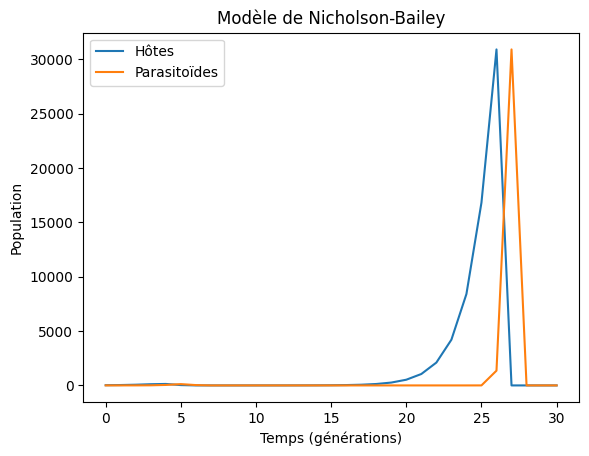

In [26]:
time = range(generations + 1)
plt.plot(time, host_pop, label="Hôtes")
plt.plot(time, parasitoid_pop, label="Parasitoïdes")
plt.xlabel("Temps (générations)")
plt.ylabel("Population")
plt.legend()
plt.title("Modèle de Nicholson-Bailey")
plt.show()